#**SIMPLE LINEAR REGRESSION**

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORT DATASET

In [161]:
data=pd.read_csv(r"/content/calories_consumed.csv")
data

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


In [162]:
from sklearn import preprocessing
data = preprocessing.normalize(data)
data=pd.DataFrame(data)
data=data.rename(columns={0:"Weight gained (grams)",1:"Calories Consumed"})
data

,Weight gained (grams),Calories Consumed
0,0.071814,0.997418
1,0.086630,0.996241
2,0.255893,0.966705
3,0.090536,0.995893
4,0.119145,0.992877
5,0.068588,0.997645
6,0.091049,0.995846
7,0.032614,0.999468
8,0.209529,0.977802
9,0.271460,0.962450


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weight gained (grams)  14 non-null     float64
 1   Calories Consumed      14 non-null     float64
dtypes: float64(2)
memory usage: 352.0 bytes


In [164]:
data=data.rename(columns={"Weight gained (grams)":"Weight_gained_grams","Calories Consumed":"Calories_Consumed"})

#lets draw some visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


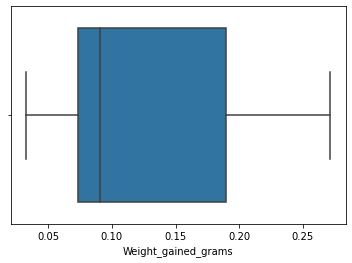

In [165]:
sns.boxplot(data["Weight_gained_grams"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


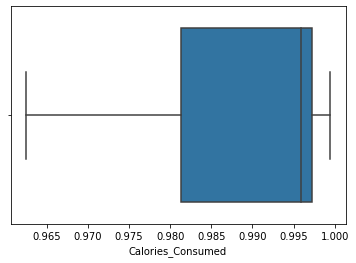

In [166]:
sns.boxplot(data['Calories_Consumed'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


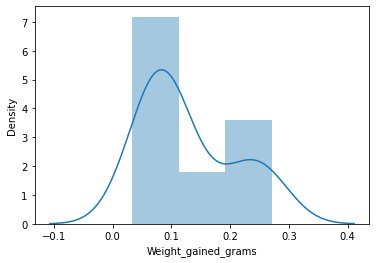

In [167]:
sns.distplot(data["Weight_gained_grams"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


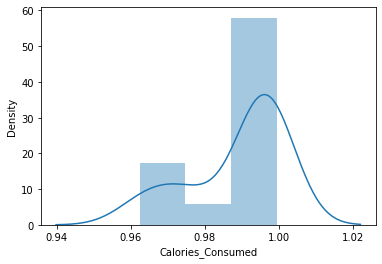

In [168]:
sns.distplot(data['Calories_Consumed'])

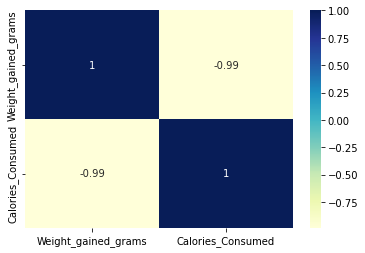

In [169]:
dataplot = sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [170]:
import scipy.stats as stats
import pylab

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([0.03261422, 0.05977317, 0.0685881 , 0.0718141 , 0.07870249,
         0.08662962, 0.09053575, 0.09104882, 0.11914522, 0.12855403,
         0.20952909, 0.22722962, 0.25589256, 0.27146017])),
 (0.07861161063745348, 0.12796549514729616, 0.9315510360670415))

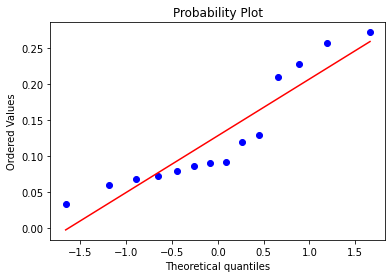

In [171]:
stats.probplot(data["Weight_gained_grams"],dist='norm',plot=pylab)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([0.96244968, 0.96670523, 0.97384121, 0.97780241, 0.99170251,
         0.99287684, 0.99584643, 0.99589321, 0.99624059, 0.99689815,
         0.99741803, 0.99764506, 0.99821199, 0.99946801])),
 (0.011999260677917045, 0.9887856674795555, 0.8764921879698225))

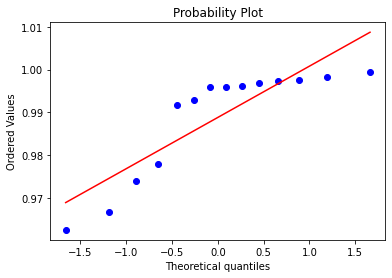

In [172]:
stats.probplot(data['Calories_Consumed'],dist='norm',plot=pylab)

#USING SIMPLE **OLS** METHOD

In [173]:
import statsmodels.formula.api as smf

In [174]:
model = smf.ols('Calories_Consumed ~ Weight_gained_grams', data =data).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Calories_Consumed   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     397.2
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           1.45e-10
Time:                        09:03:54   Log-Likelihood:                 66.382
No. Observations:                  14   AIC:                            -128.8
Df Residuals:                      12   BIC:                            -127.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.0092      0.001    845.583      0.000       1.007       1.012
Weight_gained_grams    -0.1598      0.008    -19.931      0.000      -0.177      -0.142
==============================================================================
Omnibus:                        1.536   Durbin-Watson:                   2.510
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                0.986
Skew:                          -0.624   Prob(JB):                        0.611
Kurtosis:                       2.638   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
pred=model.predict(pd.DataFrame(data['Weight_gained_grams']))
pred

0     0.997760
1     0.995392
2     0.968339
3     0.994768
4     0.990195
5     0.998276
6     0.994686
7     1.004026
8     0.975749
9     0.965851
10    0.999685
11    0.996659
12    0.988692
13    0.972920
dtype: float64

##REGRESSION LINE

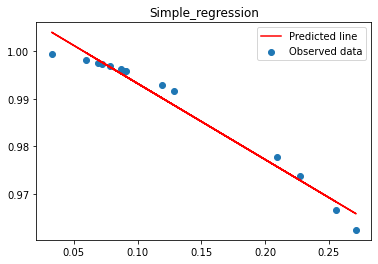

In [204]:
plt.scatter(data.Weight_gained_grams,data.Calories_Consumed)
plt.plot(data.Weight_gained_grams,pred,color="r")
plt.title("Simple_regression")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

##Error calculation of data without normal transformation

In [177]:
res=data.Calories_Consumed-pred
res

0    -0.000342
1     0.000848
2    -0.001634
3     0.001125
4     0.002681
5    -0.000631
6     0.001160
7    -0.004558
8     0.002053
9    -0.003401
10   -0.001473
11    0.000239
12    0.003011
13    0.000921
dtype: float64

In [178]:
np.mean(res)

-2.3790493384824782e-17

In [179]:
res_sqr=res*res
mse=np.mean(res_sqr)
rmse=np.sqrt(mse)
rmse

0.0021112316971886058

#LOG REGRESSOR OLS METHOD

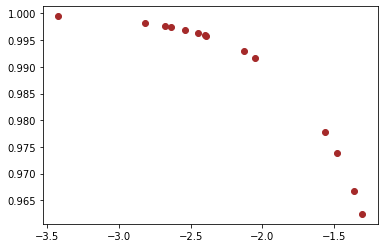

In [180]:
plt.scatter(x=np.log(data["Weight_gained_grams"]),y=data['Calories_Consumed'],color='brown')

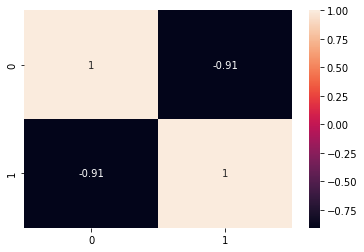

In [181]:
corr=np.corrcoef(np.log(data.Weight_gained_grams),data.Calories_Consumed)
sns.heatmap(corr,annot=True)

In [182]:
model1=smf.ols("Calories_Consumed~np.log(Weight_gained_grams)",data=data).fit()
model1.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Calories_Consumed   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     55.08
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           8.04e-06
Time:                        09:03:55   Log-Likelihood:                 53.723
No. Observations:                  14   AIC:                            -103.4
Df Residuals:                      12   BIC:                            -102.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.9470      0.006    162.663      0.000       0.934       0.960
np.log(Weight_gained_grams)    -0.0187      0.003     -7.421      0.000      -0.024      -0.013
==============================================================================
Omnibus:                        3.400   Durbin-Watson:                   2.359
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                2.059
Skew:                          -0.936   Prob(JB):                        0.357
Kurtosis:                       2.850   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
pred1=model1.predict(pd.DataFrame(data['Weight_gained_grams']))
pred1

0     0.996325
1     0.992815
2     0.972549
3     0.991990
4     0.986852
5     0.997185
6     0.991884
7     1.011094
8     0.976289
9     0.971444
10    0.999759
11    0.994611
12    0.985430
13    0.974772
dtype: float64

##Regression line for log transformation

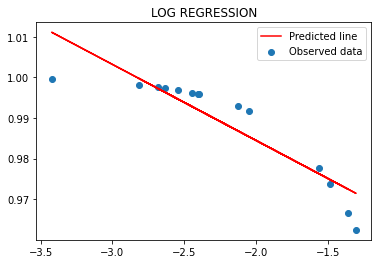

In [190]:
plt.scatter(np.log(data.Weight_gained_grams),data.Calories_Consumed)
plt.plot(np.log(data.Weight_gained_grams),pred1,color="r")
plt.title("LOG REGRESSION")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

##Error Calculation Log Regression

In [192]:
res1=data.Calories_Consumed-pred1
res1

0     0.001093
1     0.003425
2    -0.005844
3     0.003903
4     0.006025
5     0.000460
6     0.003962
7    -0.011626
8     0.001513
9    -0.008995
10   -0.001547
11    0.002287
12    0.006273
13   -0.000931
dtype: float64

In [193]:
res_sqr1=res1*res1
mse1=np.mean(res_sqr1)
rmse1=np.sqrt(mse1)
rmse1


0.00521472627515529

#EXPONENTIAL REGRESSION

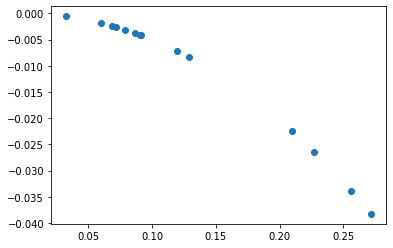

In [194]:
plt.scatter(x=data['Weight_gained_grams'],y=np.log(data['Calories_Consumed']))

In [200]:
model2=smf.ols('np.log(Calories_Consumed)~Weight_gained_grams',data=data).fit()
model2.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(Calories_Consumed)   R-squared:                       0.970
Model:                                   OLS   Adj. R-squared:                  0.967
Method:                        Least Squares   F-statistic:                     382.0
Date:                       Wed, 23 Nov 2022   Prob (F-statistic):           1.82e-10
Time:                               09:43:34   Log-Likelihood:                 65.861
No. Observations:                         14   AIC:                            -127.7
Df Residuals:                             12   BIC:                            -126.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0095      0.001      7.637      0.000       0.007       0.012
Weight_gained_grams    -0.1627      0.008    -19.545      0.000      -0.181      -0.145
==============================================================================
Omnibus:                        1.473   Durbin-Watson:                   2.512
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                0.972
Skew:                          -0.615   Prob(JB):                        0.615
Kurtosis:                       2.607   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
pred2=model2.predict(pd.DataFrame(data["Weight_gained_grams"]))
pred2_Calories_Consumed=np.exp(pred2)
pred2_Calories_Consumed

0     0.997780
1     0.995379
2     0.968346
3     0.994746
4     0.990128
5     0.998304
6     0.994663
7     1.004163
8     0.975677
9     0.965897
10    0.999737
11    0.996663
12    0.988613
13    0.972871
dtype: float64

##Regression Line For Exponential regressor

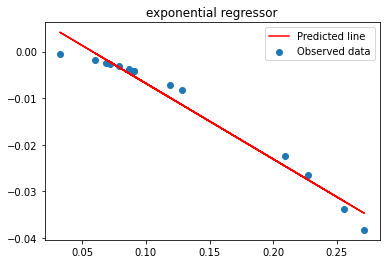

In [202]:
plt.scatter(data.Weight_gained_grams,np.log(data.Calories_Consumed))
plt.plot(data.Weight_gained_grams,pred2,color="red")
plt.title("exponential regressor")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

##Error Calculation for Exponential regressor

In [205]:
res2=data.Calories_Consumed-pred2_Calories_Consumed
res2

0    -0.000362
1     0.000862
2    -0.001641
3     0.001147
4     0.002749
5    -0.000659
6     0.001183
7    -0.004695
8     0.002126
9    -0.003447
10   -0.001525
11    0.000235
12    0.003089
13    0.000970
dtype: float64

In [206]:
res_sqr2=res2*res2
mse2=np.mean(res_sqr2)
rmse2=np.sqrt(mse2)
rmse2

0.0021643559305724947

#Polynomial Regressor

In [208]:
model3=smf.ols('np.log(Calories_Consumed)~Weight_gained_grams+I(Weight_gained_grams*Weight_gained_grams)',data=data).fit()
model3.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(Calories_Consumed)   R-squared:                       1.000
Model:                                   OLS   Adj. R-squared:                  1.000
Method:                        Least Squares   F-statistic:                 3.391e+05
Date:                       Wed, 23 Nov 2022   Prob (F-statistic):           4.52e-27
Time:                               10:04:09   Log-Likelihood:                 118.63
No. Observations:                         14   AIC:                            -231.3
Df Residuals:                             11   BIC:                            -229.3
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.0003   7.39e-05     -3.485      0.005      -0.000    -9.5e-05
Weight_gained_grams                              0.0065      0.001      5.432      0.000       0.004       0.009
I(Weight_gained_grams * Weight_gained_grams)    -0.5385      0.004   -143.682      0.000      -0.547      -0.530
==============================================================================
Omnibus:                        1.560   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                0.856
Skew:                           0.596   Prob(JB):                        0.652
Kurtosis:                       2.789   Cond. No.                         260.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
pred3=model3.predict(pd.DataFrame(data))
pred3

0    -0.002569
1    -0.003737
2    -0.033860
3    -0.004084
4    -0.007129
5    -0.002346
6    -0.004131
7    -0.000619
8    -0.022541
9    -0.038180
10   -0.001794
11   -0.003083
12   -0.008323
13   -0.026589
dtype: float64

In [211]:
pred3_Calories_Consumed=np.exp(pred3)
pred3_Calories_Consumed

0     0.997434
1     0.996270
2     0.966707
3     0.995924
4     0.992896
5     0.997657
6     0.995877
7     0.999381
8     0.977712
9     0.962540
10    0.998208
11    0.996922
12    0.991711
13    0.973761
dtype: float64

##POLYNOMIAL REGRESSOR LINE

In [257]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = data.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.        , 0.0718141 , 0.00515726],
       [1.        , 0.08662962, 0.00750469],
       [1.        , 0.25589256, 0.065481  ],
       [1.        , 0.09053575, 0.00819672],
       [1.        , 0.11914522, 0.01419558],
       [1.        , 0.0685881 , 0.00470433],
       [1.        , 0.09104882, 0.00828989],
       [1.        , 0.03261422, 0.00106369],
       [1.        , 0.20952909, 0.04390244],
       [1.        , 0.27146017, 0.07369062],
       [1.        , 0.05977317, 0.00357283],
       [1.        , 0.07870249, 0.00619408],
       [1.        , 0.12855403, 0.01652614],
       [1.        , 0.22722962, 0.0516333 ]])

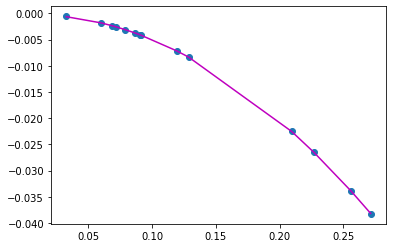

In [263]:
import operator
plt.scatter(data.Weight_gained_grams,np.log(data.Calories_Consumed))
poly_reg = PolynomialFeatures(degree = 2)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,pred3), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()


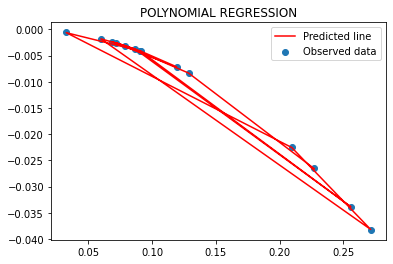

In [264]:
plt.scatter(data.Weight_gained_grams,np.log(data.Calories_Consumed))
plt.plot(X,pred3,color="red")
plt.title("POLYNOMIAL REGRESSION")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

#ERROR CALCULATION OF POLYNOMIAL REGRESSOR

In [217]:
res3=data.Calories_Consumed-pred3_Calories_Consumed
res_sqr3=res3*res3
mse3=np.mean(res_sqr3)
rmse3=np.sqrt(mse3)
rmse3

4.955861496992677e-05

#CHOOSE THE BEST FIT MODEL

In [219]:
data1 = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse, rmse1,rmse2, rmse3])}
table_rmse = pd.DataFrame(data1)
table_rmse

,MODEL,RMSE
0,SLR,0.002111
1,Log model,0.005215
2,Exp model,0.002164
3,Poly model,0.000050


#THE BEST MODEL IS POLY REGRESSOR SO WE ARE GOING TO USE IT

##SPLIT THE MODEL


In [220]:
from sklearn.model_selection import train_test_split

In [223]:
train, test = train_test_split(data, test_size = 0.2,random_state=0)
train

,Weight_gained_grams,Calories_Consumed
11,0.078702,0.996898
2,0.255893,0.966705
13,0.227230,0.973841
9,0.271460,0.962450
1,0.086630,0.996241
7,0.032614,0.999468
10,0.059773,0.998212
3,0.090536,0.995893
0,0.071814,0.997418
5,0.068588,0.997645


In [224]:
test

,Weight_gained_grams,Calories_Consumed
8,0.209529,0.977802
6,0.091049,0.995846
4,0.119145,0.992877


##plot the scatter Of Train and Test data

Text(0.5, 1.0, 'TRAIN_SCATTER')

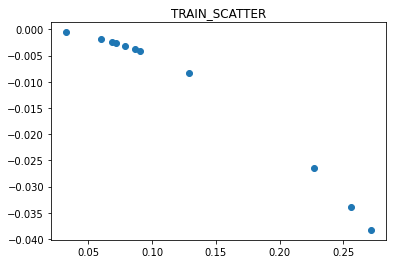

In [227]:
plt.scatter(train.Weight_gained_grams,np.log(train.Calories_Consumed))
plt.title("TRAIN_SCATTER")

Text(0.5, 1.0, 'TEST_SCATTER')

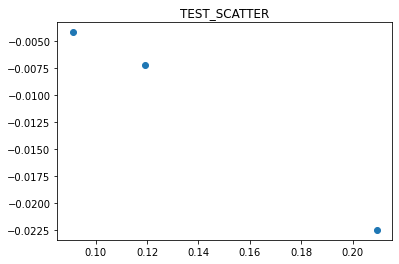

In [228]:
plt.scatter(test.Weight_gained_grams,np.log(test.Calories_Consumed))
plt.title("TEST_SCATTER")

In [229]:
Finalmodel=smf.ols('np.log(Calories_Consumed)~Weight_gained_grams+I(Weight_gained_grams*Weight_gained_grams)',data=train).fit()
Finalmodel.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(Calories_Consumed)   R-squared:                       1.000
Model:                                   OLS   Adj. R-squared:                  1.000
Method:                        Least Squares   F-statistic:                 3.336e+05
Date:                       Wed, 23 Nov 2022   Prob (F-statistic):           2.07e-20
Time:                               10:46:09   Log-Likelihood:                 94.044
No. Observations:                         11   AIC:                            -182.1
Df Residuals:                              8   BIC:                            -180.9
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.0002   7.89e-05     -2.785      0.024      -0.000   -3.78e-05
Weight_gained_grams                              0.0059      0.001      4.380      0.002       0.003       0.009
I(Weight_gained_grams * Weight_gained_grams)    -0.5370      0.004   -128.301      0.000      -0.547      -0.527
==============================================================================
Omnibus:                        3.003   Durbin-Watson:                   2.469
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                1.069
Skew:                           0.752   Prob(JB):                        0.586
Kurtosis:                       3.264   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Prediction on Train Data

In [239]:
train_pred = Finalmodel.predict(pd.DataFrame(train))
train_pred

11   -0.003083
2    -0.033878
13   -0.026610
9    -0.038195
1    -0.003740
7    -0.000599
10   -0.001787
3    -0.004089
0    -0.002567
5    -0.002342
12   -0.008338
dtype: float64

In [240]:
pred_train_Calories_Consumed = np.exp(train_pred)
pred_train_Calories_Consumed

11    0.996922
2     0.966690
13    0.973741
9     0.962525
1     0.996267
7     0.999401
10    0.998215
3     0.995920
0     0.997437
5     0.997660
12    0.991697
dtype: float64

##Model evaluation on train data

In [241]:
train_res = train.Calories_Consumed - pred_train_Calories_Consumed
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse


4.583299126964495e-05

##Prediction On Test Data

In [231]:
test_pred=Finalmodel.predict(pd.DataFrame(test))
test_pred

8   -0.022563
6   -0.004136
4   -0.007142
dtype: float64

In [232]:
pred_test_Calories_consumed = np.exp(test_pred)
pred_test_Calories_consumed

8    0.977690
6    0.995873
4    0.992884
dtype: float64

#Model evaluation Test data

In [238]:
test_res = test.Calories_Consumed- pred_test_Calories_consumed
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

6.684494758662211e-05